# TKT4108 Structural Dynamics 2

## Solution Exercise 13

**Main topics:** Wind

**References:** Github examples, lecture notes


### Problem 1: Single degree of freedom system

**a**) 

The drag force is
$$ q_D(t)  = \frac{1}{2}\rho A C_D \left( V+u(t)-\dot{r}(t) \right)^2 $$

The linearized expression becomes:

$$q_D(t)  \approx \frac{1}{2}\rho A C_D V^2\left( 1 + 2\frac{u(t)}{V} -2 \frac{\dot{r}(t)}{V} \right) $$

The equation of motion is:

$$ m \ddot{r}(t)+c \dot{r}(t)+k r(t)=q_D(t) $$

After rearranging terms, we have:

$$ m \ddot{r}(t)+(c+\rho A C_D V) \dot{r}(t)+k r(t)=\frac{1}{2}\rho A C_D V^2 + \rho A C_D V u(t) $$

We see that $c_{aero}=-\rho A C_D V$ (the negative sign is due to $c_{aero}$ being defined as positive when it is on the right-hand side of the equation. Aerodynamic damping will (almost) always lead to increased damping).

The static load is $\frac{1}{2}\rho A C_D V^2 $

The dynamic load is $ \rho A C_D V u(t) $

**b**)

The static response can be calculated from the stiffness and static load:

$$
r=\dfrac{\frac{1}{2}\rho A C_D V^2}{k} =
\dfrac{\frac{1}{2} \cdot 1.2 \cdot 200 \cdot 0.7 \cdot 40^2}{5\cdot 10^6}=0.0268=26.8 \text{\: mm}
$$

**c**)

The frequency is $\omega_n=\sqrt{k/m}=\sqrt{5}=2.23$ rad/s or $0.35$ Hz.

The structural damping ratio is
$
\xi=\dfrac{c}{2\sqrt{km}}=
\dfrac{10^4}{2\sqrt{5\cdot10^6 \cdot 10^6}}=0.22 \%
$

For $V=40$:

$$-c_{aero}=\rho A C_D V=1.2 \cdot 200 \cdot 0.7 \cdot 40=6700$$

$$
\xi=\dfrac{c-c_{aero}}{2\sqrt{km}}=
\dfrac{10^4+6.7\cdot 10^3}{2\sqrt{5\cdot10^6 \cdot 10^6}}=0.36 \%
$$

In this case, the contribution from the aerodynamic damping is rather small.

**d**)


The frequency response function is:

$$ H(\omega)=\dfrac{1}{-\omega^2 m +i\omega(c+\rho A C_D V) +k}$$

The dynamic load is $q(t)=\rho A C_D V u(t)$, so the spectral density of the dynamic load is:

$$
S_q(\omega)=
(\rho A C_D V)^2 S_u(\omega)
$$

The response spectrum is as usual:

$$
S_r(\omega)=
|H(\omega)|^2
S_q(\omega)
$$




The standard deviation is 25.70 mm


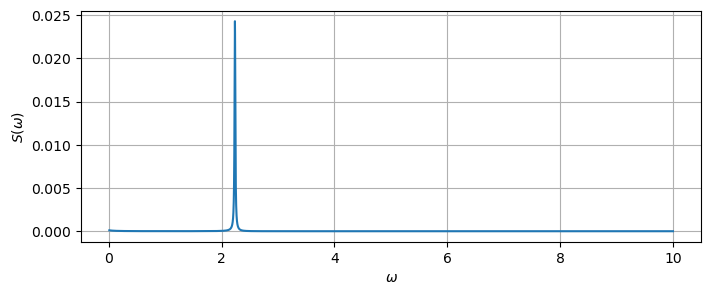

In [25]:
import numpy as np
from matplotlib import pyplot as plt

# Structural parameters
m=1e6
k=5e6
c=1e4

omega = np.linspace(0.01,10,10000)

xLu=200.0 # Length scale
Au=5.0 # Spectral parameter
V=40.0 # Mean wind velocity
Iu=0.10 # Turbulence intensity

# Turbulence spectrum
omega_u=omega*xLu/V
sigma_u=V*Iu
Su = (sigma_u)**2 /omega*(Au/(2*np.pi))*omega_u/((1+1.5*(Au/(2*np.pi))*omega_u)**(5.0/3.0))

D=20.0 # Diameter
B=10.0 # Width
A=D*B
CD=0.7 # Drag coefficient
rho=1.2 # Air density

Sq=(rho*A*CD*V)**2*Su # Load spectrum

c_aero=-rho*A*CD*V # Aerodynamic damping coefficient

H=1/(-omega**2*m+1j*(c-c_aero)*omega+k) # Frequency response function

Sr=np.abs(H)**2*Sq # Response spectrum

plt.figure(figsize=(8,3))
plt.plot(omega,Sr)
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.grid()

sigma=np.trapz(Sr,omega)**0.5

print('The standard deviation is ' + '{:.2f}'.format(sigma*1000) + ' mm')


**e**)

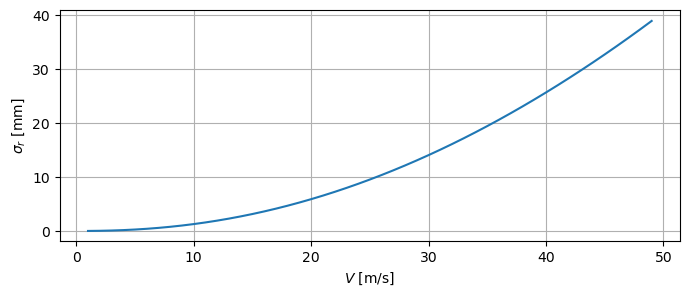

In [26]:

V_vec=np.arange(1.0,50.0,1.0) # V from 1 to 50 m/s

sigma_vec=np.zeros_like(V_vec) # Standard deviation

for idx, V in np.ndenumerate(V_vec):
    
    omega_u=omega*xLu/V
    sigma_u=V*Iu
    Su = (sigma_u)**2 /omega*(Au/(2*np.pi))*omega_u/((1+1.5*(Au/(2*np.pi))*omega_u)**(5.0/3.0))

    Sq=(rho*A*CD*V)**2*Su

    c_aero=-rho*A*CD*V

    H=1/(-omega**2*m+1j*(c-c_aero)*omega+k)

    Sr=np.abs(H)**2*Sq

    sigma_vec[idx]=np.trapz(Sr,omega)**0.5

plt.figure(figsize=(8,3))
plt.plot(V_vec,sigma_vec*1000)
plt.xlabel('$V$ [m/s]')
plt.ylabel('$\sigma_r$ [mm]')
plt.grid()

**e**)

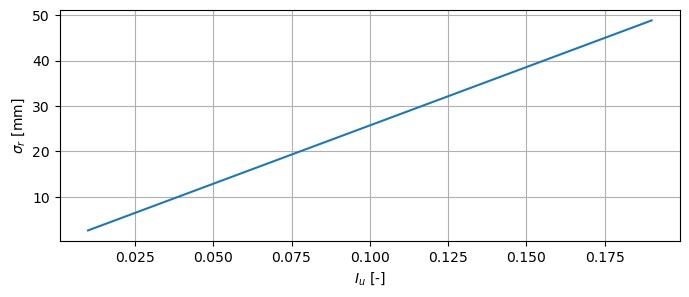

In [27]:
V=40.0

Iu_vec=np.arange(0.01,0.2,0.01) # Iu from 1% to 20%

sigma_vec=np.zeros_like(Iu_vec) # Standard deviation

for idx, Iu in np.ndenumerate(Iu_vec):
    
    omega_u=omega*xLu/V
    sigma_u=V*Iu
    Su = (sigma_u)**2 /omega*(Au/(2*np.pi))*omega_u/((1+1.5*(Au/(2*np.pi))*omega_u)**(5.0/3.0))

    Sq=(rho*A*CD*V)**2*Su

    c_aero=-rho*A*CD*V

    H=1/(-omega**2*m+1j*(c-c_aero)*omega+k)

    Sr=np.abs(H)**2*Sq

    sigma_vec[idx]=np.trapz(Sr,omega)**0.5

plt.figure(figsize=(8,3))
plt.plot(Iu_vec,sigma_vec*1000)
plt.xlabel('$I_u$ [-]')
plt.ylabel('$\sigma_r$ [mm]')
plt.grid()

The change in $I_u$ directly influences $\sigma_u$, which only leads to a scaling of the load magnitude. The resulting response will be directly scaled in the same fashion, so a straight line is observed.

For a variation in $V$, the effects are more complicated. A larger $V$ leads to a larger $\sigma_u$ (when $I_u$ is constant). Moreover, as $V$ is increased, the shape of the turbulence spectrum changes slightly (energy is shifted towards the lower range). However, the system damping ratio also increases due to aerodynamic damping. The combined result of all these is a parabolic-like response curve, as shown in d).

### Problem 2: Distributed loads on a long-span bridge

**a**) 

The wind load (without static load) is:
$$
q(x,t)=\rho D C_D V u(x,t) - \rho D C_D V \dot{r}(x,t)
$$

We consider first the turbulence term:


$$
\tilde{q}(t)=
\frac{1}{\tilde{M} } \int_0^L \phi(x) q(x,t) \: \text{d} x=
\frac{1}{\tilde{M} }  \rho D C_D V  \int_0^L \phi(x) \: u(x,t) \:\text{d} x
$$

Next, we consider the term related to aerodynamic damping:


$$
\frac{1}{\tilde{M} } \int_0^L \phi(x) q(x,t) \: \text{d} x=
-\frac{1}{\tilde{M} } \int_0^L \phi(x) \rho D C_D V \dot{r}(x,t) \: \text{d} x=
-\frac{1}{\tilde{M} } \int_0^L \phi(x) \rho D C_D V \phi(x) \dot{z}(t) \: \text{d} x=
\underbrace{
-\frac{1}{\tilde{M} }  \rho D C_D V  \int_0^L \phi(x)^2  \: \text{d} x}_{\tilde{c}_{ae}} \: \dot{z}(t)
$$


**b)** 

We consider the definition of the auto correlation and insert the expression for $\tilde{q}(t) $:

$$
\begin{aligned}
R_{ \tilde{q} }(t_1,t_2) &= E \Big[ \tilde{q}(t_1) \: \tilde{q}(t_2) \Big] \\
&= E \Big[
\frac{1}{\tilde{M}} \rho D C_D V \int_0^L \phi(x_1) u(x_1,t_1) \: \text{d}x_1 
\cdot
\frac{1}{\tilde{M}} \rho D C_D V \int_0^L \phi(x_2) u(x_2,t_2) \: \text{d}x_2
\Big] \\
&= 
 \frac{1}{\tilde{M}^2} (  \rho D C_D V )^2
\int_0^L \int_0^L
\phi(x_1) \phi(x_2) 
E \Big[u(x_1,t_1) u(x_2,t_2) \Big] 
\text{d}x_1  \text{d}x_2 
 \\
&= 
 \frac{1}{\tilde{M}^2} (  \rho D C_D V )^2
\int_0^L \int_0^L
\phi(x_1) \phi(x_2) 
R_u( \tau,\Delta x ) 
\text{d}x_1  \text{d}x_2 
\end{aligned}
$$

Here, we have assumed

$\quad$ *i*) Stationarity, so $R$ is a function of $\tau=t_2-t_1$ only

$\quad$ *ii*) Homogenity, so $R$ is a function of $\Delta x=|x_2-x_1|$ only







**c)**

Inserting the obtained expression for $R_{ \tilde{q} }(\tau)$:

$$
\begin{aligned}
S_{ \tilde{q} }(\omega) &= \frac{1}{2 \pi} \int_{-\infty}^{\infty} {R_{ \tilde{q} }(\tau) e^{-i \omega \tau} \: \text{d} \tau} \\
&= \frac{1}{\tilde{M}^2} (  \rho D C_D V )^2
\int_0^L \int_0^L
\phi(x_1) \phi(x_2) 
\Big(
\frac{1}{2 \pi} \int_{-\infty}^{\infty} 
R_u(\tau, \Delta x ) 
 e^{-i \omega \tau} \: \text{d} \tau
\Big)
 \text{d}x_1  \text{d}x_2  \\
&= \frac{1}{\tilde{M}^2} (  \rho D C_D V )^2
\int_0^L \int_0^L
\phi(x_1) \phi(x_2) 
S_{u_1 u_2}(\omega, \Delta x)
\: \text{d}x_1  \text{d}x_2  \\
\end{aligned}
$$

**d)**

Text(0.5, 1.0, 'Mode shape')

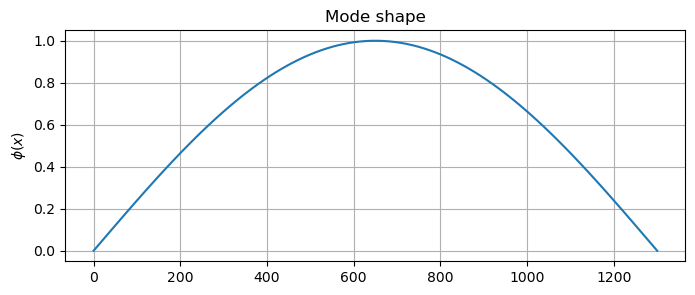

In [28]:
import numpy as np
from matplotlib import pyplot as plt

# Mode shape
L = 1300
x = np.linspace(0,L,100)
phi = np.sin(np.pi*x/L)

plt.figure(figsize=(8,3))
plt.plot(x,phi)
plt.grid()
plt.ylabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('Mode shape')

Text(0.5, 1.0, 'Modal load spectrum')

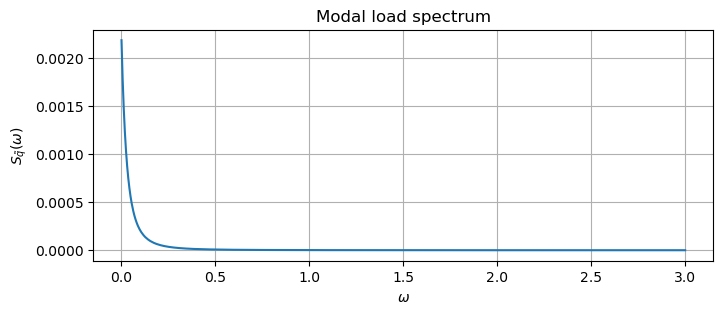

In [29]:

rho = 1.2 # Air density
V = 30 # Mean wind
D = 3.3 # Height
CD = 0.6 # Drag coefficient

Iu = 0.10 # Turbulence intensity
xLu = 200.0 # Length scale
Au = 6.8 # Spectral parameter
Cu = 10 # Coherence parameter

omega = np.linspace(0.001,3,1000) # Fine frequency axis, for final response spectrum
omega_load = np.logspace(-3,1,100) # Crude frequency axis, for faster integration of loads

# Turbulence spectrum
omega_u=omega_load*xLu/V
sigma_u=V*Iu
Su = (sigma_u)**2 /omega_load*(Au/(2*np.pi))*omega_u/((1+1.5*(Au/(2*np.pi))*omega_u)**(5.0/3.0))

fn=0.05
omegan = fn*2*np.pi
xi = 0.3/100
M_modal =1e7

# Auto-spectral density of load
SQ_red = np.zeros(omega_load.shape[0])
SQ = np.zeros(omega.shape[0])
dx = np.abs(np.array([x])-np.array([x]).T) # All possible combinations of distances
for k in range(omega_load.shape[0]):
    Suu = Su[k]*np.exp(-Cu*omega_load[k]*dx/(V*2*np.pi))
    phiphi = np.array([phi]).T @ np.array([phi])
    integrand = (1/M_modal*rho*D*CD*V)**2*Suu*phiphi            
    SQ_red[k]=np.trapz(np.trapz(integrand,x),x)
SQ = np.interp(omega,omega_load,SQ_red)

plt.figure(figsize=(8,3))
plt.plot(omega,SQ)
plt.grid()
plt.ylabel(r'$S_{\tilde{q}}(\omega)$')
plt.xlabel(r'$\omega$')
plt.title('Modal load spectrum')

Text(0.5, 1.0, 'Frequency response function')

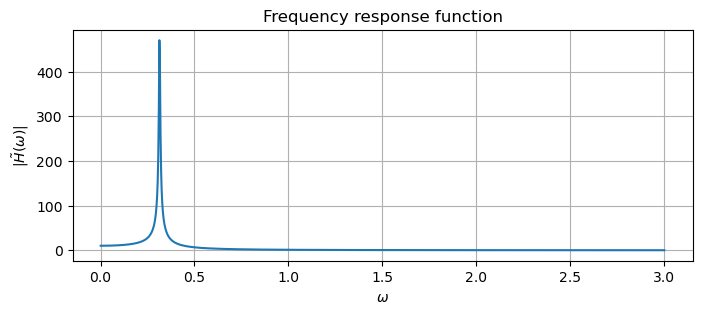

In [30]:
cae_modal = -1/M_modal*rho*D*CD*V*np.trapz(phi**2,x)
H_gen=1/( -omega**2+1j*omega*(2*omegan*xi-cae_modal)+omegan**2)

plt.figure(figsize=(8,3))
plt.plot(omega,np.abs(H_gen))
plt.grid()
plt.ylabel(r'$|\tilde{H}(\omega)|$')
plt.xlabel(r'$\omega$')
plt.title('Frequency response function')

Text(0.5, 1.0, 'Auto-spectral density of response mid span')

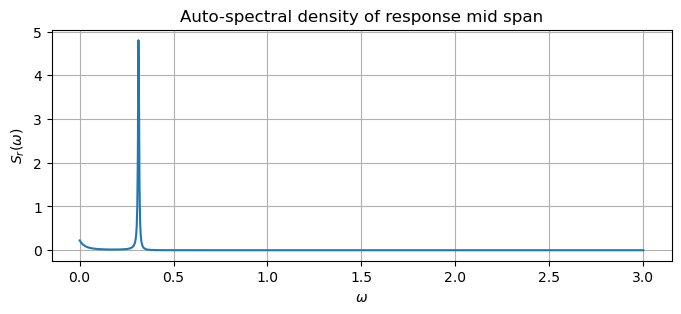

In [31]:
phi_r = np.sin(np.pi*0.5)
Sr = phi_r**2*np.abs(H_gen)**2*SQ

plt.figure(figsize=(8,3))
plt.plot(omega,Sr)
plt.grid()
plt.ylabel('$S_r(\omega)$')
plt.xlabel('$\omega$')
plt.title('Auto-spectral density of response mid span')

In [32]:
sd_midspan = np.trapz(Sr,omega)**0.5

print('Standard deviation of displacement at mid span is ' + '{:.3f}'.format(sd_midspan) + ' m')

Standard deviation of displacement at mid span is 0.249 m
